In [4]:
#Подключаем библиотеки
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape #В обучающем наборе имеется 60 000 изображений, каждое изображение представлено как 28 x 28 пикселей

test_images.shape #В тестовом наборе имеется 10 000 изображений, каждое изображение представлено как 28 x 28 пикселей

len(train_labels) #В учебном наборе 60 000 меток

len(test_labels) #В тестовом наборе 10 000 меток

train_labels #Каждая метка представляет собой целое число от 0 до 9 (Показывается первые 3 метки и последние 3 метки)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

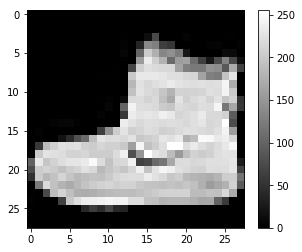

In [8]:
#пред обработка данных
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

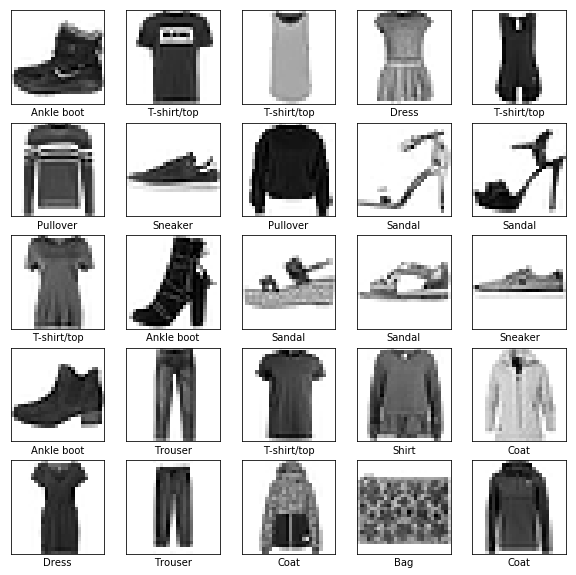

In [10]:
#Отобразим первые 25 изображений из тренировочного набора
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#обучение модели
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - ETA: 9:08 - loss: 2.5739 - accuracy: 0.0000e+ - ETA: 12s - loss: 1.1962 - accuracy: 0.6081     - ETA: 7s - loss: 0.9974 - accuracy: 0.662 - ETA: 5s - loss: 0.8959 - accuracy: 0.69 - ETA: 4s - loss: 0.8292 - accuracy: 0.71 - ETA: 3s - loss: 0.7887 - accuracy: 0.73 - ETA: 3s - loss: 0.7484 - accuracy: 0.74 - ETA: 2s - loss: 0.7232 - accuracy: 0.75 - ETA: 2s - loss: 0.7040 - accuracy: 0.75 - ETA: 2s - loss: 0.6839 - accuracy: 0.76 - ETA: 2s - loss: 0.6686 - accuracy: 0.76 - ETA: 2s - loss: 0.6566 - accuracy: 0.77 - ETA: 2s - loss: 0.6464 - accuracy: 0.77 - ETA: 1s - loss: 0.6346 - accuracy: 0.77 - ETA: 1s - loss: 0.6252 - accuracy: 0.78 - ETA: 1s - loss: 0.6175 - accuracy: 0.78 - ETA: 1s - loss: 0.6083 - accuracy: 0.78 - ETA: 1s - loss: 0.5983 - accuracy: 0.79 - ETA: 1s - loss: 0.5903 - accuracy: 0.79 - ETA: 1s - loss: 0.5831 - accuracy: 0.79 - ETA: 1s - loss: 0.5781 - accuracy: 0.79 - ETA: 1s - loss: 0.5724 -

60000/60000 [==============================] - ETA: 3s - loss: 0.1300 - accuracy: 0.96 - ETA: 1s - loss: 0.3186 - accuracy: 0.89 - ETA: 1s - loss: 0.2927 - accuracy: 0.89 - ETA: 1s - loss: 0.3015 - accuracy: 0.89 - ETA: 1s - loss: 0.3184 - accuracy: 0.89 - ETA: 1s - loss: 0.3221 - accuracy: 0.89 - ETA: 1s - loss: 0.3179 - accuracy: 0.89 - ETA: 1s - loss: 0.3198 - accuracy: 0.89 - ETA: 1s - loss: 0.3175 - accuracy: 0.89 - ETA: 1s - loss: 0.3191 - accuracy: 0.89 - ETA: 1s - loss: 0.3192 - accuracy: 0.89 - ETA: 1s - loss: 0.3159 - accuracy: 0.89 - ETA: 1s - loss: 0.3153 - accuracy: 0.89 - ETA: 1s - loss: 0.3151 - accuracy: 0.89 - ETA: 1s - loss: 0.3165 - accuracy: 0.89 - ETA: 1s - loss: 0.3185 - accuracy: 0.89 - ETA: 1s - loss: 0.3187 - accuracy: 0.89 - ETA: 1s - loss: 0.3188 - accuracy: 0.88 - ETA: 1s - loss: 0.3173 - accuracy: 0.89 - ETA: 0s - loss: 0.3170 - accuracy: 0.89 - ETA: 0s - loss: 0.3191 - accuracy: 0.88 - ETA: 0s - loss: 0.3199 - accuracy: 0.88 - ETA: 0s - loss: 0.3213 - accu

In [15]:
#оценка точности
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 0s 21us/sample - loss: 0.2546 - accuracy: 0.8612
Test accuracy: 0.8612


In [16]:
#прогрназирование
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([6.4400574e-10, 1.1915282e-12, 2.6712164e-11, 1.2636629e-10,
       1.7141799e-10, 2.2567033e-04, 8.4346247e-10, 1.2626790e-02,
       5.0233609e-07, 9.8714709e-01], dtype=float32)

In [18]:
np.argmax(predictions[0]) #9

9

In [19]:
#функции для визуализации этих предсказаний
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

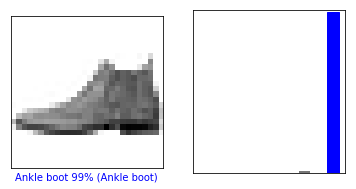

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

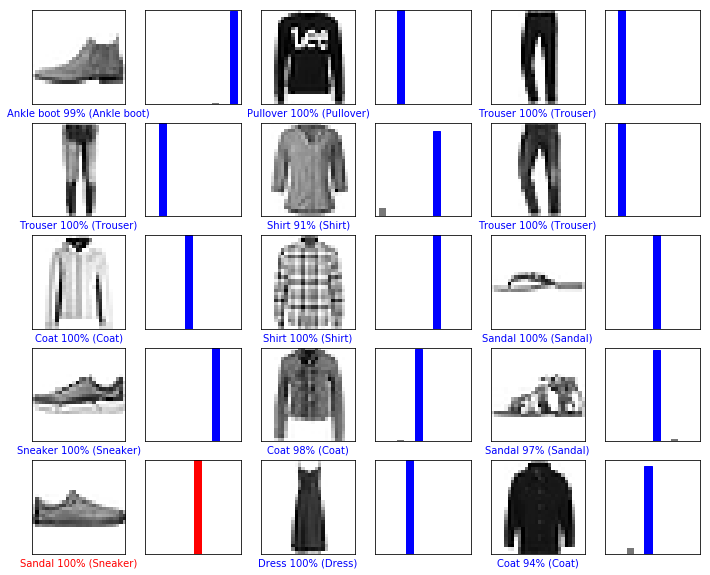

In [21]:
#Построим несколько изображений с их прогнозами. Правильные метки прогноза — синие, а неправильные метки прогноза — красные.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [23]:
# Возьмём изображение из тестового набора данных
img = test_images[0]
#Добавим изображение в пакет, где он является единственным членом
img = (np.expand_dims (img, 0))

In [24]:
predictions_single = model.predict(img)
print(predictions_single)

[[6.4400330e-10 1.1915305e-12 2.6712164e-11 1.2636557e-10 1.7141734e-10
  2.2566968e-04 8.4346247e-10 1.2626742e-02 5.0233513e-07 9.8714709e-01]]


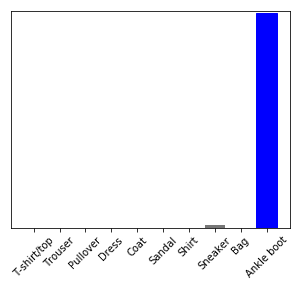

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)